<a href="https://colab.research.google.com/github/SauKno/Final_Project_Sales_Projection/blob/Trial/Data_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install visualpython --upgrade

     |████████████████████████████████| 10.5 MB 5.2 MB/s 


In [57]:
!visualpy install

Package install command: pip
Jupyter nbextension is not activated
Please install Jupyter nbextension
for conda env
conda install -c conda-forge jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
--------------------------------------------------------------------------------------------
for pip
pip install -e jupyter_contrib_nbextensions
jupyter contrib nbextension install --user


In [132]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
import math
import visualpython as vs

# Pretty display for notebooks
%matplotlib inline

#  Import and read the two data sets csv.
ifood_data = pd.read_csv("/content/customer_data.csv")

In [133]:
list(ifood_data.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [134]:
# Drop irrelevant data
ifood_data_clean = ifood_data.drop(columns=['ID', 'Dt_Customer', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue'])

In [135]:
ifood_data_clean.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0
5,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,0,0,0,0,0,0
6,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,0,0,0,0,0,0
7,1985,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,0,0,0,0,0,0
8,1974,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,0,0,0,0,0,1
9,1950,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,1,0,0,0,0,0


In [136]:
# Find random sample of data for training data table
ifood_data_sample = ifood_data_clean.sample(frac=0.3)

ifood_data_sample.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
1516,1962,Graduation,Married,55759.0,0,1,84,675,0,85,10,7,77,0,0,0,0,0,0
444,1974,2n Cycle,Married,20130.0,0,0,99,0,6,3,7,6,12,0,0,0,0,0,0
2180,1974,Graduation,Married,26067.0,1,0,49,22,2,18,0,2,12,0,0,0,0,0,0
16,1980,Graduation,Married,41850.0,1,1,51,53,5,19,2,13,4,0,0,0,0,0,0
336,1968,Graduation,Divorced,75693.0,0,0,10,797,153,293,72,97,30,0,1,1,1,0,1
1869,1977,2n Cycle,Together,82326.0,0,0,30,938,142,754,159,81,183,0,1,1,1,0,1
775,1953,Graduation,Together,41452.0,1,1,86,13,0,3,0,0,0,0,0,0,0,0,0
1545,1986,Master,Together,42386.0,1,0,43,65,4,16,0,4,11,0,0,0,0,0,0
529,1960,PhD,Married,49154.0,1,1,69,206,10,67,30,27,71,0,0,0,0,0,0
29,1965,PhD,Married,84618.0,0,0,96,684,100,801,21,66,0,0,0,1,0,0,0


In [137]:
#Summarize sample data
ifood_data_sample.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
count,672.000000,662.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1968.462798,51195.483384,0.453869,0.532738,47.044643,287.147321,24.074405,149.589286,33.403274,23.674107,43.212798,0.059524,0.072917,0.071429,0.066964,0.011905,0.139881
std,11.894787,31829.833098,0.538489,0.533916,29.394857,331.312061,37.359299,215.383395,50.216042,38.757099,53.142535,0.236779,0.260193,0.257731,0.250146,0.108538,0.347122
min,1899.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,34583.500000,0.000000,0.000000,21.000000,22.000000,1.000000,15.000000,2.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1969.000000,49679.500000,0.000000,1.000000,47.500000,158.000000,7.000000,56.000000,11.000000,6.000000,21.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,66460.750000,1.000000,1.000000,72.000000,476.750000,28.000000,207.000000,43.000000,27.250000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,194.000000,1622.000000,258.000000,263.000000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
# Summarize total data
ifood_data_clean.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
# Check data type for machine model
ifood_data_sample.dtypes

Year_Birth            int64
Education            object
Marital_Status       object
Income              float64
Kidhome               int64
Teenhome              int64
Recency               int64
MntWines              int64
MntFruits             int64
MntMeatProducts       int64
MntFishProducts       int64
MntSweetProducts      int64
MntGoldProds          int64
AcceptedCmp3          int64
AcceptedCmp4          int64
AcceptedCmp5          int64
AcceptedCmp1          int64
AcceptedCmp2          int64
Response              int64
dtype: object

In [140]:
ifood_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 1516 to 1020
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year_Birth        672 non-null    int64  
 1   Education         672 non-null    object 
 2   Marital_Status    672 non-null    object 
 3   Income            662 non-null    float64
 4   Kidhome           672 non-null    int64  
 5   Teenhome          672 non-null    int64  
 6   Recency           672 non-null    int64  
 7   MntWines          672 non-null    int64  
 8   MntFruits         672 non-null    int64  
 9   MntMeatProducts   672 non-null    int64  
 10  MntFishProducts   672 non-null    int64  
 11  MntSweetProducts  672 non-null    int64  
 12  MntGoldProds      672 non-null    int64  
 13  AcceptedCmp3      672 non-null    int64  
 14  AcceptedCmp4      672 non-null    int64  
 15  AcceptedCmp5      672 non-null    int64  
 16  AcceptedCmp1      672 non-null    int64 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


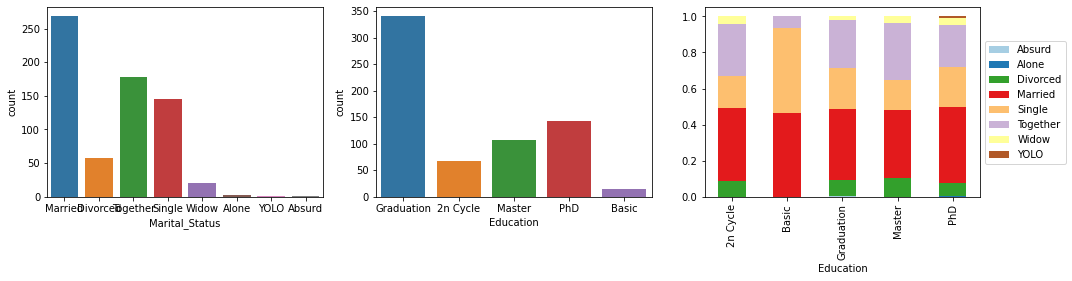

In [141]:
# Taking a look at the categorical variables
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(ifood_data_sample['Marital_Status'], ax=ax[0])
sns.countplot(ifood_data_sample['Education'], ax=ax[1])
df_plot = ifood_data_sample.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
fig.show()

In [ ]:
# Replace values of campaign to number of campaign that impacted customer

In [142]:
ifood_data_sample["AcceptedCmp3"].replace({"1":"3"}, inplace=True)

In [143]:
ifood_data_sample["AcceptedCmp2"].replace({"1":"2"}, inplace=True)

In [144]:
ifood_data_sample["AcceptedCmp4"].replace({"1":"4"}, inplace=True)

In [145]:
ifood_data_sample["AcceptedCmp5"].replace({"1":"5"}, inplace=True)

In [146]:
ifood_data_sample["Response"].replace({"1":"6"}, inplace=True)

In [147]:
# Make a new column that indicates the campaign number that impacted the scholar
ifood_data_sample['AcceptedCmpOverall'] = ifood_data_sample['AcceptedCmp3']+ifood_data_sample['AcceptedCmp2']+ifood_data_sample['AcceptedCmp4']+ifood_data_sample['AcceptedCmp5']+ifood_data_sample['Response']

In [148]:
# Convert birth year to age
ifood_data_sample['Age'] = date.today().year - ifood_data_sample['Year_Birth']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff00323fe50>,
      dtype=object)

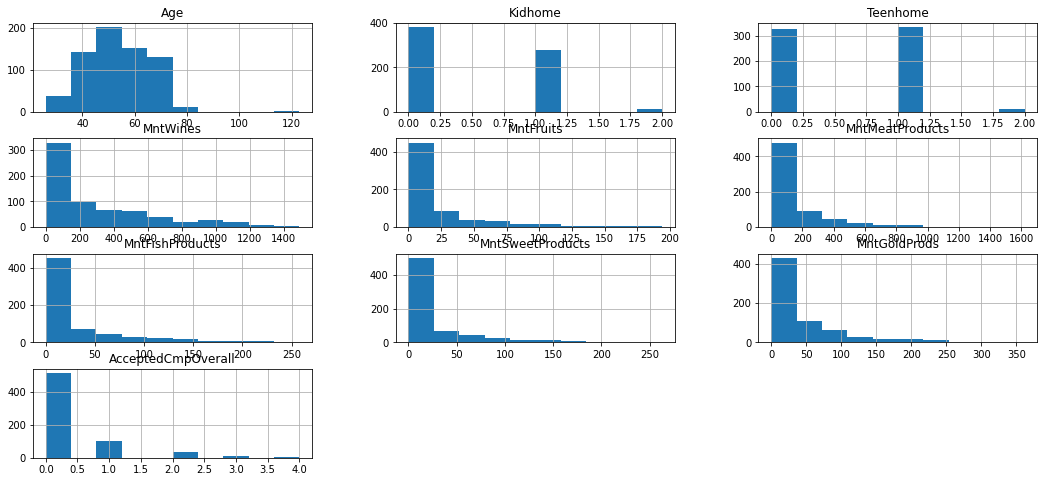

In [149]:
# Histogram for each element
ifood_data_sample.hist( column = ['Age', 'Kidhome', 'Teenhome', 'Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmpOverall'], figsize=(18,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff00322d390>]],
      dtype=object)

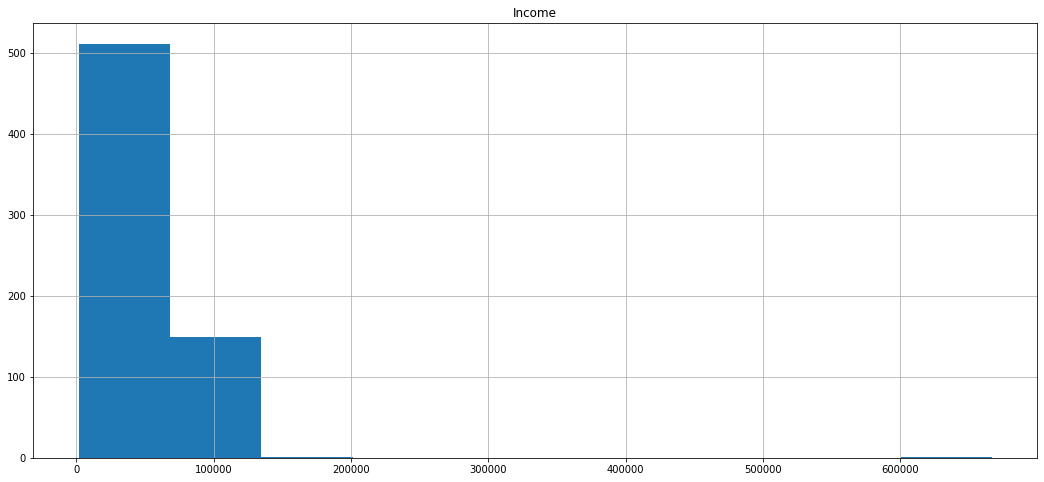

In [150]:
ifood_data_sample.hist( column = ['Income'], figsize=(18,8))

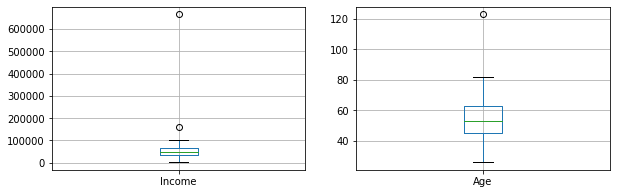

In [151]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

ifood_data_sample.boxplot(column=['Income'], ax=ax[0])
ifood_data_sample.boxplot(column=['Age'], ax=ax[1])

In [155]:
ifood_age_income = ifood_data_sample.drop(columns=['Kidhome', 'Teenhome', 'Education', 'Marital_Status'])

In [156]:
ifood_age_income.dtypes

Year_Birth              int64
Income                float64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
AcceptedCmpOverall      int64
Age                     int64
dtype: object

[]


Text(0.5, 1.0, 'Correlation between factors')

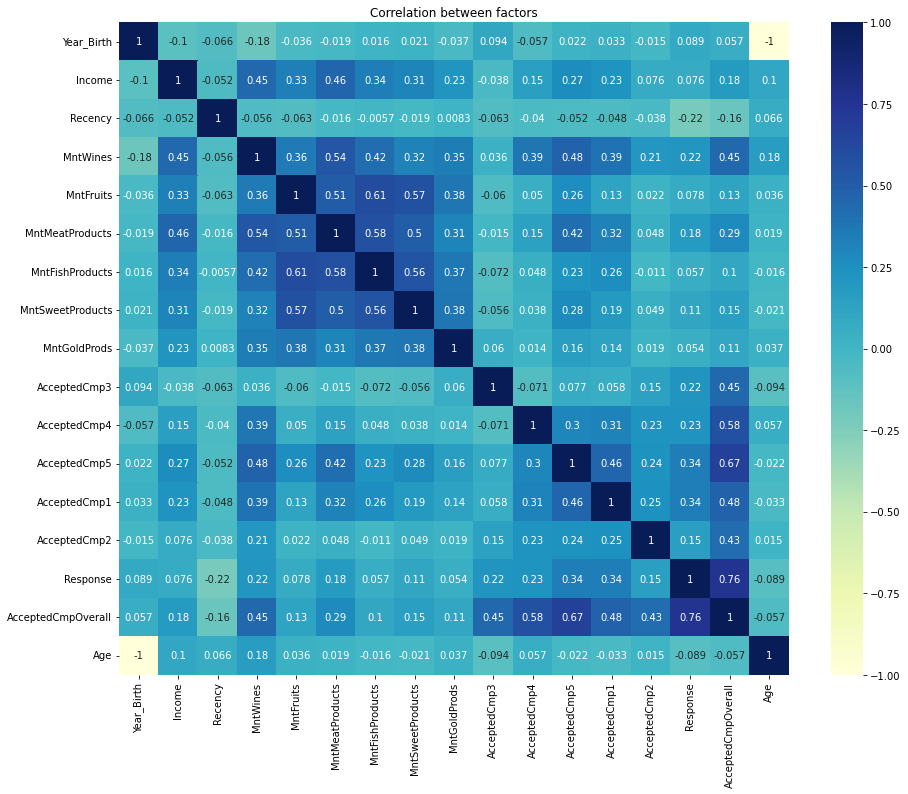

In [158]:
#Assess correlation between factors
import seaborn as sn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col = ifood_age_income.select_dtypes(include="object").columns.tolist()
print(cat_col)
for i in cat_col:
    ifood_age_income.loc[:, i] = le.fit_transform(ifood_age_income.loc[:, i]) 
fig, ax = plt.subplots(figsize=(15, 12))
sn.heatmap(ifood_age_income.corr(), annot=True, cmap="YlGnBu").set_title("Correlation between factors")

In [170]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col = ifood_age_income.select_dtypes(include="object").columns.tolist()
print(cat_col)
for i in cat_col:
    ifood_age_income.loc[:, i] = le.fit_transform(ifood_age_income.loc[:, i]) 
test_data=ifood_age_income.fillna(0)
test_data.head(10)

[]


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,AcceptedCmpOverall,Age
1516,1962,55759.0,84,675,0,85,10,7,77,0,0,0,0,0,0,0,60
444,1974,20130.0,99,0,6,3,7,6,12,0,0,0,0,0,0,0,48
2180,1974,26067.0,49,22,2,18,0,2,12,0,0,0,0,0,0,0,48
16,1980,41850.0,51,53,5,19,2,13,4,0,0,0,0,0,0,0,42
336,1968,75693.0,10,797,153,293,72,97,30,0,1,1,1,0,1,3,54
1869,1977,82326.0,30,938,142,754,159,81,183,0,1,1,1,0,1,3,45
775,1953,41452.0,86,13,0,3,0,0,0,0,0,0,0,0,0,0,69
1545,1986,42386.0,43,65,4,16,0,4,11,0,0,0,0,0,0,0,36
529,1960,49154.0,69,206,10,67,30,27,71,0,0,0,0,0,0,0,62
29,1965,84618.0,96,684,100,801,21,66,0,0,0,1,0,0,0,1,57


In [174]:
test_data2= test_data.drop(['Recency'], axis=1)

In [179]:
# Scale data for model training 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_r = sc.fit_transform(test_data2)
y_train_r=test_data2.iloc[:, 9].values

In [180]:
#Fit Linear Regression Reduced Model
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression()
lin_r.fit(X_train_r ,y_train_r)
Y_pred_lin_r = lin_r.predict(X_train_r)
print(Y_pred_lin_r)

[ 1.38777878e-17  4.16333634e-17  4.16333634e-17  1.38777878e-17
  1.00000000e+00  1.00000000e+00  1.80411242e-16 -2.77555756e-17
  9.71445147e-17 -4.02455846e-16  9.71445147e-17 -1.24900090e-16
 -2.77555756e-17  2.08166817e-16  1.00000000e+00  2.77555756e-17
 -6.93889390e-17  6.93889390e-17 -2.77555756e-17  1.52655666e-16
 -1.52655666e-16  1.38777878e-17  1.00000000e+00  6.93889390e-17
 -5.55111512e-17  1.38777878e-17  5.55111512e-17  1.24900090e-16
  4.16333634e-17  8.32667268e-17  3.19189120e-16  9.71445147e-17
  1.80411242e-16 -1.38777878e-17 -5.41233725e-16  1.66533454e-16
  9.71445147e-17  1.38777878e-17  6.93889390e-17  2.77555756e-17
  1.24900090e-16  1.52655666e-16  8.32667268e-17  5.55111512e-17
  5.55111512e-17  9.71445147e-17  4.16333634e-17 -6.93889390e-17
 -3.19189120e-16  1.38777878e-17  5.55111512e-17 -1.24900090e-16
  2.77555756e-17  1.38777878e-17  1.00000000e+00 -1.38777878e-17
  1.80411242e-16 -2.77555756e-17  1.52655666e-16  4.16333634e-17
  2.77555756e-17  6.93889

In [181]:
#Store R-Squared, RMSE and MAE of Linear Regression Reduced Model in the designated lists
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Reduced_model_R_2=[]
Reduced_model_RMSE=[]
Reduced_model_MAE=[]

x_true = test_data['Recency'].to_list()
R_2_lin_r=r2_score(x_true, Y_pred_lin_r)
RMSE_lin_r=np.sqrt(mean_squared_error(x_true, Y_pred_lin_r))
MAE_lin_r=mean_absolute_error(x_true, Y_pred_lin_r)

Reduced_model_R_2.append(R_2_lin_r)
Reduced_model_RMSE.append(RMSE_lin_r)
Reduced_model_MAE.append(MAE_lin_r)

In [182]:
#Fit Decision Tree Regression Reduced Model
from sklearn.tree import DecisionTreeRegressor
Dec_Tree_r = DecisionTreeRegressor()
Dec_Tree_r.fit(X_train_r ,y_train_r)
Y_pred_Dec_Tree_r = Dec_Tree_r.predict(X_train_r)
print(Y_pred_Dec_Tree_r)

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.

In [183]:
#Store R-Squared, RMSE and MAE of the Decision Tree Regression Reduced Model in the designated lists
x_true = test_data['Recency'].to_list()
R_2_Dec_Tree_r=r2_score(x_true, Y_pred_Dec_Tree_r)
RMSE_Dec_Tree_r=np.sqrt(mean_squared_error(x_true, Y_pred_Dec_Tree_r))
MAE_Dec_Tree_r=mean_absolute_error(x_true, Y_pred_Dec_Tree_r)

Reduced_model_R_2.append(R_2_Dec_Tree_r)
Reduced_model_RMSE.append(RMSE_Dec_Tree_r)
Reduced_model_MAE.append(MAE_Dec_Tree_r)

In [184]:
#Fit KNN Regression Reduced Model
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor()
knn_r.fit(X_train_r ,y_train_r)
Y_pred_knn_r = knn_r.predict(X_train_r)
print(Y_pred_knn_r)

[0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.
 0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.
 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

In [185]:
#Store R-Squared, RMSE and MAE of the KNN Regression Reduced Model in the designated lists
x_true = test_data['Recency'].to_list()
R_2_KNN_r=r2_score(x_true, Y_pred_knn_r)
RMSE_KNN_r=np.sqrt(mean_squared_error(x_true, Y_pred_knn_r))
MAE_KNN_r=mean_absolute_error(x_true, Y_pred_knn_r)

Reduced_model_R_2.append(R_2_KNN_r)
Reduced_model_RMSE.append(RMSE_KNN_r)
Reduced_model_MAE.append(MAE_KNN_r)

In [186]:
#Fit Random Forest Reduced model
from sklearn.ensemble import RandomForestRegressor
RandomForest_r = RandomForestRegressor()
RandomForest_r.fit(X_train_r, y_train_r)
Y_pred_RandomForest_r = RandomForest_r.predict(X_train_r)
print(Y_pred_RandomForest_r)

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.

In [188]:
#Store R-Squared, RMSE and MAE of the Random Forest Regressor Reduced Model in the designated lists
x_true = test_data['Recency'].to_list()
R_2_RandomForest_r=r2_score(x_true, Y_pred_RandomForest_r)
RMSE_RandomForest_r=np.sqrt(mean_squared_error(x_true, Y_pred_RandomForest_r))
MAE_RandomForest_r=mean_absolute_error(x_true, Y_pred_RandomForest_r)

Reduced_model_R_2.append(R_2_RandomForest_r)
Reduced_model_RMSE.append(RMSE_RandomForest_r)
Reduced_model_MAE.append(MAE_RandomForest_r)

In [189]:
#Print Designated Lists
print(Reduced_model_R_2)
print(Reduced_model_RMSE)
print(Reduced_model_MAE)

[-2.558059148334187, -2.558059148334187, -2.5583875472548536, -2.558059148334187]
[55.405714098474576, 55.405714098474576, 55.40827093580197, 55.405714098474576]
[46.97172619047619, 46.97172619047619, 46.9735119047619, 46.97172619047619]


In [190]:
#Compare R Squared Value Across all models fitted

#As the table and bar chart shown, Full model led to higher R Squared Value Acorss all approaches

#Find the highest value and the corresponding model of choice
